# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img, img_to_array
import keras
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [9]:
def create_padding(input_image, d):  
      
    n, m = input_image.shape # height, width, channels
    
    output_image = np.zeros((n + 2 * d, m + 2 * d))
    output_image[d:d + n, d:d + m] = input_image   

    return output_image


**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [10]:
def convolution(input_image, kernel):
    
    n, m = input_image.shape
    k, _ = kernel.shape  

    # Height and width of the output image 
    output_height = n - k + 1
    output_width = m - k + 1

    output_image = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            # Region of the input image corresponding to the kernel
            region = input_image[i:i+k, j:j+k] 
            # Perform the convolution 
            output_image[i, j] = np.einsum('ij,ij->', region, kernel)

    return output_image


**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [11]:
def pooling(input_image, p, pooling_type = "max_pooling"):

    n, m = input_image.shape
    output_height = n - p + 1
    output_width = m - p + 1

    output_image = np.zeros((output_height, output_width))

    if pooling_type == "max_pooling":
        for i in range(output_height):
            for j in range(output_width):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.max(region)
        

    elif pooling_type == "avg_pooling":
        for i in range(output_height):
            for j in range(output_width):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.mean(region)

    return(output_image)
    

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

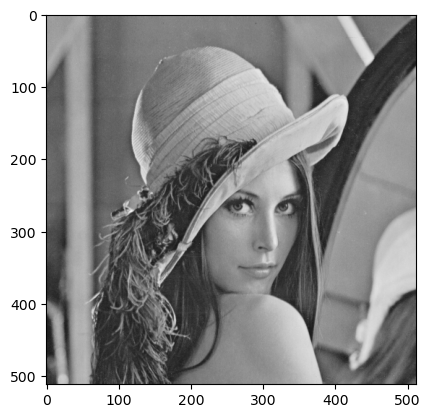

In [12]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

**Answer** 

1. The First kernel given above is used to detect vertical edges in the image. It identifies vertical edges by computing the difference in intensity between the left and right sides of a pixel. Areas with a significant intensity transition from positive values (light area) on the left and negative values(dark area) on the right will have high positive values in the output image and regions where the transition is from dark to light will result in high negative values, whereas pixels in areas with no vertical contrast will result in values close to zero. Therefore the output image will prominently display vertical lines corresponding to strong vertical edges in the image.

2. The second kernel is used for detecting horizontal edges in an image. It operates by calculating the intensity difference between the top and bottom parts of a pixel. Areas with a significant intensity transition from dark (negative values) at the top to light (positive values) at the bottom will produce high positive values in the output image and areas with intensity transition from light at the top to dark at the bottom will produce high negative values, whereas regions without notable horizontal contrast will result in values close to zero. Therefore, the output image will prominently display horizontal lines in the output image highlighting horizontal boundaries across the input image.

3. The third kernel, which is Sobel X kernel is also used to identify vertical edges in the input image. It calculates the gradient of pixel intensity using a weighted approach that gives more weight to the immediate neighbors, allowing for a more refined detection of edges compared to the 1st kernel. When this kernel is applied, areas where there is a significant increase in intensity from left to right will be marked as bright lines and intensity decreases from left to right the output image will be marked as dark lines in the output image, while regions with little or no intensity change will remain unchanged.

4. The fourth kernel, which is Sobel Y kernel is used to identify horizontal edges in the input image. It calculates the gradient of pixel intensity using a weighted approach that emphasizes the immediate neighbors, enabling a more refined detection of edges compared to simpler methods. When the Sobel Y kernel is applied, areas where there is a significant increase in intensity from top to bottom will be marked as dark lines, while areas where intensity decreases from top to bottom will appear as bright lines in the output image. Conversely, regions with little or no intensity change will remain largely unchanged. Therefore the output image after applying the sobel Y kernel highlights horizontal lines which were there in the input image.

5. Laplacian kernel is also used to identify edges as it is capable of highlighting regions of rapd intensity change. Unlike the Sobel kernels, which focus on directional edges, the Laplacian kernel provides information about edges in all orientations. When the Laplacian kernel is applied to the input image, areas where there is a rapid change in intensity will result in high positive or negative values in the output image, which will appear prominently as bright or dark lines, depending on the nature of the intensity transition. Also, areas with little or no change in intensity will yield values close to zero, remaining largely unchanged in the output.

    Laplacian kernel = $\begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{bmatrix}$

In [41]:
# To maintain the size of the image after convolution,
# n + 2d -k + 1 = n
# d = (k-1)/2

kernels = {
    "Vertical Edge Detection": np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    "Horizontal Edge Detection": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Sobel X": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Y": np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
    "Laplacian" :  np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
}

# Normalize to [0, 1]
input_image = img_to_array(lena).astype('float32') / 255.0  
input_image = input_image[:, :, 0]  

conv_results = {}
max_pool_results = {}

for i, (name, kernel) in enumerate(kernels.items(), start=2):
    p = (kernel.shape[0] - 1) // 2 
    padded_image = create_padding(input_image, p)
    convolved_image = convolution(padded_image, kernel)
    conv_results[name] = convolved_image

    max_pooled_image = pooling(convolved_image, 3, pooling_type="max_pooling")
    max_pool_results[name] = max_pooled_image
    

Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

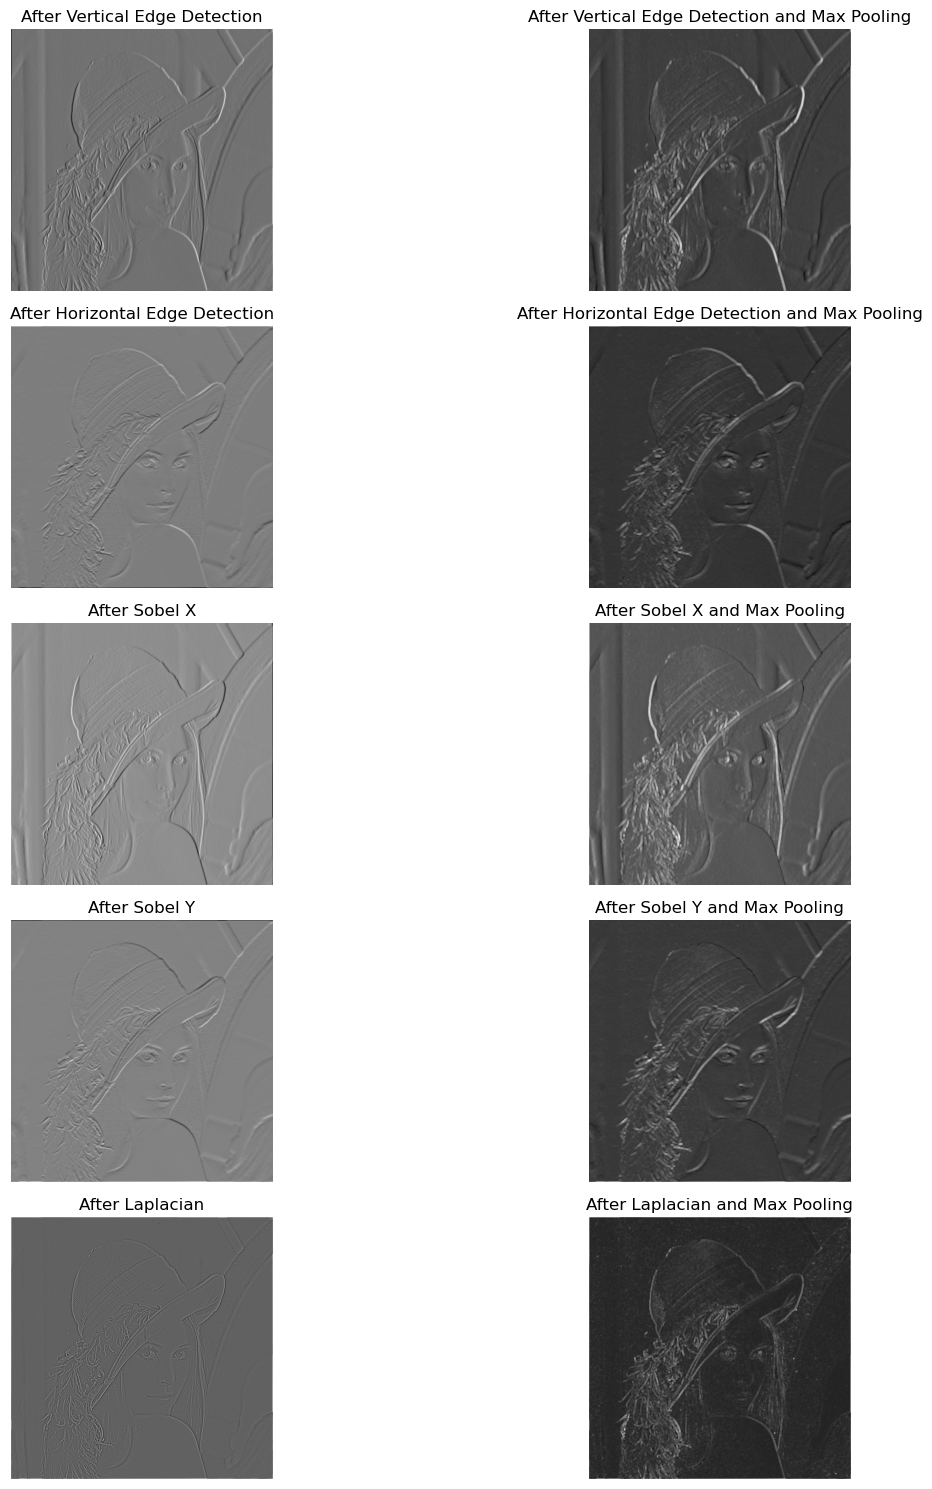

In [82]:
plt.figure(figsize=(15,15))
for i, name in enumerate(kernels.keys()):
    # Plot convolution result
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(conv_results[name], cmap='gray')
    plt.title(f'After {name}')
    plt.axis('off')
    
    # Plot max pooling result
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(max_pool_results[name], cmap='gray')
    plt.title(f'After {name} and Max Pooling')
    plt.axis('off')

plt.tight_layout()  
plt.show()


<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** 

Yes, the above experiment is successful in demonstrating the effectiveness of different kernels for edge detection. Each kernel produced distinct results that highlighted specific features in the Lena image. The first kernel and Sobel X kernel have effectively identified horizontal edges in the input image whereas the second kernel and Sobel Y kernel have been able to effectively identify vertical edges in the input image which can be seen from 1st four convolution results. Also, the fifth convolutional result indicate that the Laplacian kernel has been able to provide a comprehensive edge detection across all orientations. In addition to that, the max pooling operation has been able to further refine these results by enhancing the clarity of the edges and making them more distinguishable. Also, this max pooling process resulted in retaining only the most significant features in the input image and reducing the dimensionality of the image. 


From this experiment, I learned about the different kernels available for edge detection and their specific functionalities, such as the Sobel and Laplacian kernels. I discovered how these kernels extract various features from an image such as edges and textures that are critical for image analysis. Additionally, I gained insight into the role of max pooling in simplifying the output by retaining only the most significant features while reducing the dimensionality of the image.  The combination of applying different kernels and using max pooling helped with improving my understanding of feature extraction techniques used in CNNs for effective image classification and recognition tasks.

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

(50000, 32, 32, 3)
(10000, 32, 32, 3)


/tmp/ipykernel_2989589/1955430091.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(y_train[i]))


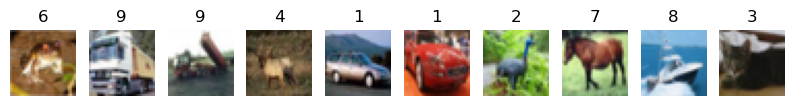

In [76]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

# airplane (0), automobile(1), bird(2), cat(3), deer(4), dog(5), frog(6), horse(7), ship(8), truck(9)

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(int(y_train[i]))
    plt.axis('off')

plt.show()

In [77]:
# Normalize to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0  

In [69]:
def create_model():
    model = keras.models.Sequential()
    # CNN 
    
    # first convolutional layer
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    # second convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    # third convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
   
    # Feed Forward Neural Network
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [70]:

def k_fold_cross_validation(x_train, y_train, batch_size = 32, epochs = 10):
    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model = create_model()  
        model.fit(x_train_fold, y_train_fold, epochs = epochs,  batch_size = batch_size, validation_data=(x_val_fold, y_val_fold), verbose = 1)
        
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")
        fold_accuracies.append(val_accuracy)

    # Calculate the average cross-validation accuracy
    print(fold_accuracies)
    cross_val_accuracy = np.mean(fold_accuracies)
    print(f"5-Fold Cross-Validation Accuracy: {cross_val_accuracy}")

batch_size = 32
epochs = 15
k_fold_cross_validation(x_train, y_train, batch_size, epochs)


/home/venukshi.20/miniconda3/envs/simlord/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3583 - loss: 1.7386 - val_accuracy: 0.5848 - val_loss: 1.1513
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6292 - loss: 1.0614 - val_accuracy: 0.6760 - val_loss: 0.9268
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7054 - loss: 0.8558 - val_accuracy: 0.7061 - val_loss: 0.8603
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7530 - loss: 0.7213 - val_accuracy: 0.7184 - val_loss: 0.8250
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7869 - loss: 0.6208 - val_accuracy: 0.7138 - val_loss: 0.8766
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8153 - loss: 0.5374 - val_accuracy: 0.7238 - val_loss: 0.8386
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8421 - loss: 0.4607 - val_accuracy: 0.7213 - val_loss: 0.9149
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8637 -

In [77]:
def create_model():

    model = keras.models.Sequential()
    # CNN 
    
    # first convolutional layer
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    # second convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    # third convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # fourth convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # Feed Forward Neural Network
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def k_fold_cross_validation(x_train, y_train, batch_size = 32, epochs = 10):

    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model = create_model()  
        model.fit(x_train_fold, y_train_fold, epochs = epochs,  batch_size = batch_size, validation_data=(x_val_fold, y_val_fold), verbose = 1)
        
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")
        fold_accuracies.append(val_accuracy)

    # Calculate the average cross-validation accuracy
    print(fold_accuracies)
    cross_val_accuracy = np.mean(fold_accuracies)
    print(f"5-Fold Cross-Validation Accuracy: {cross_val_accuracy}")

batch_size = 32
epochs = 15
k_fold_cross_validation(x_train, y_train, batch_size, epochs)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.3453 - loss: 1.7674 - val_accuracy: 0.5570 - val_loss: 1.2274
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6048 - loss: 1.1128 - val_accuracy: 0.6538 - val_loss: 0.9840
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6841 - loss: 0.8943 - val_accuracy: 0.6964 - val_loss: 0.8553
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7365 - loss: 0.7495 - val_accuracy: 0.7241 - val_loss: 0.8091
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.7741 - loss: 0.6523 - val_accuracy: 0.7316 - val_loss: 0.7944
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.8015 - loss: 0.5681 - val_accuracy: 0.7397 - val_loss: 0.7523
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.8296 - loss: 0.4888 - val_accuracy: 0.7542 - val_loss: 0.7387
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.8606 -

In [81]:
def create_model():

    model = keras.models.Sequential()
    # CNN 
    
    # first convolutional layer
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    # second convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    # third convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # fourth convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # fifth convolutional layer
    model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))

    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))


    # Feed Forward Neural Network
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def k_fold_cross_validation(x_train, y_train, batch_size = 32, epochs = 10):

    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model = create_model()  
        model.fit(x_train_fold, y_train_fold, epochs = epochs,  batch_size = batch_size, validation_data=(x_val_fold, y_val_fold), verbose = 1)
        
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")
        fold_accuracies.append(val_accuracy)

    # Calculate the average cross-validation accuracy
    print(fold_accuracies)
    cross_val_accuracy = np.mean(fold_accuracies)
    print(f"5-Fold Cross-Validation Accuracy: {cross_val_accuracy}")

batch_size = 32
epochs = 15
k_fold_cross_validation(x_train, y_train, batch_size, epochs)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.2973 - loss: 1.8689 - val_accuracy: 0.5471 - val_loss: 1.2527
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5691 - loss: 1.2154 - val_accuracy: 0.6130 - val_loss: 1.1073
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6614 - loss: 0.9710 - val_accuracy: 0.6666 - val_loss: 0.9490
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7172 - loss: 0.8130 - val_accuracy: 0.7050 - val_loss: 0.8532
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7554 - loss: 0.7050 - val_accuracy: 0.7082 - val_loss: 0.8753
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7876 - loss: 0.6064 - val_accuracy: 0.7221 - val_loss: 0.8443
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8124 - loss: 0.5265 - val_accuracy: 0.7138 - val_loss: 0.8863
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.8471 -

In [82]:
def create_model():

    model = keras.models.Sequential()
    # CNN 
    
    # first convolutional layer
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    # second convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    # third convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # fourth convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # Feed Forward Neural Network
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def k_fold_cross_validation(x_train, y_train, batch_size = 32, epochs = 10):

    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model = create_model()  
        model.fit(x_train_fold, y_train_fold, epochs = epochs,  batch_size = batch_size, validation_data=(x_val_fold, y_val_fold), verbose = 1)
        
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")
        fold_accuracies.append(val_accuracy)

    # Calculate the average cross-validation accuracy
    print(fold_accuracies)
    cross_val_accuracy = np.mean(fold_accuracies)
    print(f"5-Fold Cross-Validation Accuracy: {cross_val_accuracy}")

batch_size = 64
epochs = 15
k_fold_cross_validation(x_train, y_train, batch_size, epochs)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3378 - loss: 1.7837 - val_accuracy: 0.5508 - val_loss: 1.2466
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5908 - loss: 1.1530 - val_accuracy: 0.6534 - val_loss: 0.9882
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6770 - loss: 0.9181 - val_accuracy: 0.6870 - val_loss: 0.8920
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7331 - loss: 0.7627 - val_accuracy: 0.7237 - val_loss: 0.7893
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7681 - loss: 0.6677 - val_accuracy: 0.7207 - val_loss: 0.8065
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7957 - loss: 0.5821 - val_accuracy: 0.7489 - val_loss: 0.7307
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8162 - loss: 0.5214 - val_accuracy: 0.7471 - val_loss: 0.7513
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8405 - loss: 0.4559 - 

In [46]:
def create_model():

    model = keras.models.Sequential()
    # CNN 
    
    # first convolutional layer
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    # second convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    # third convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # fourth convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # Feed Forward Neural Network
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def k_fold_cross_validation(x_train, y_train, batch_size = 32, epochs = 10):

    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model = create_model()  
        model.fit(x_train_fold, y_train_fold, epochs = epochs,  batch_size = batch_size, validation_data=(x_val_fold, y_val_fold), verbose = 1)
        
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")
        fold_accuracies.append(val_accuracy)

    # Calculate the average cross-validation accuracy
    print(fold_accuracies)
    cross_val_accuracy = np.mean(fold_accuracies)
    print(f"5-Fold Cross-Validation Accuracy: {cross_val_accuracy}")

batch_size = 32
epochs = 20
k_fold_cross_validation(x_train, y_train, batch_size, epochs)


/home/venukshi.20/miniconda3/envs/simlord/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730122872.619194 2989589 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730122872.621491 2989589 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730122872.6

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.3181 - loss: 1.8278 - val_accuracy: 0.5905 - val_loss: 1.1269
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.6136 - loss: 1.0830 - val_accuracy: 0.6775 - val_loss: 0.9179
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7007 - loss: 0.8463 - val_accuracy: 0.7031 - val_loss: 0.8387
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.7508 - loss: 0.7111 - val_accuracy: 0.7203 - val_loss: 0.8128
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.7846 - loss: 0.6095 - val_accuracy: 0.7364 - val_loss: 0.7700
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.8127 - loss: 0.5343 - val_accuracy: 0.7483 - val_loss: 0.7715
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8412 - loss: 0.4504 - val_accuracy: 0.7341 - val_loss: 0.8283
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.8603 -

In [60]:
def create_model():
    model = keras.models.Sequential()
    
    # First convolutional layer
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    # Second convolutional layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    
    # Pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Dropout(0.25))  
    
    # Third convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

    # Fourth convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Dropout(0.25)) 
    
    # Fifth convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    #  Pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Dropout(0.25)) 
    
    # Flatten the output
    model.add(keras.layers.Flatten())
    
    # Fully connected layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5)) 
    
    # Output layer
    model.add(keras.layers.Dense(10, activation='softmax')) 

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


def k_fold_cross_validation(x_train, y_train, batch_size=32, epochs=10):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        model = create_model()  
        model.fit(x_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size,
                  validation_data=(x_val_fold, y_val_fold), verbose=1)
        
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        print(f"Validation Accuracy: {val_accuracy}")
        fold_accuracies.append(val_accuracy)

    # Calculate the average cross-validation accuracy
    print(fold_accuracies)
    cross_val_accuracy = np.mean(fold_accuracies)
    print(f"5-Fold Cross-Validation Accuracy: {cross_val_accuracy}")

batch_size = 64
epochs = 40
k_fold_cross_validation(x_train, y_train, batch_size, epochs)


Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.1966 - loss: 2.1031 - val_accuracy: 0.4257 - val_loss: 1.5579
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.3941 - loss: 1.6379 - val_accuracy: 0.4967 - val_loss: 1.3697
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.4712 - loss: 1.4601 - val_accuracy: 0.5512 - val_loss: 1.2713
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5131 - loss: 1.3593 - val_accuracy: 0.5726 - val_loss: 1.2354
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.5473 - loss: 1.2884 - val_accuracy: 0.6235 - val_loss: 1.0871
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5823 - loss: 1.1969 - val_accuracy: 0.6279 - val_loss: 1.0742
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5959 - loss: 1.1679 - val_accuracy: 0.6547 - val_loss: 0.9851
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6170 - loss: 1.1208 - 

/home/venukshi.20/miniconda3/envs/simlord/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.3513 - loss: 1.7672 - val_accuracy: 0.5810 - val_loss: 1.2006
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.6056 - loss: 1.1165 - val_accuracy: 0.6710 - val_loss: 0.9437
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.6887 - loss: 0.8903 - val_accuracy: 0.7068 - val_loss: 0.8514
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7409 - loss: 0.7461 - val_accuracy: 0.7176 - val_loss: 0.8303
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7720 - loss: 0.6606 - val_accuracy: 0.7494 - val_loss: 0.7202
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8008 - loss: 0.5681 - val_accuracy: 0.7484 - val_loss: 0.7414
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8240 - loss: 0.4961 - val_accuracy: 0.7506 - val_loss: 0.7503
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8523 - loss: 0.4263 - 

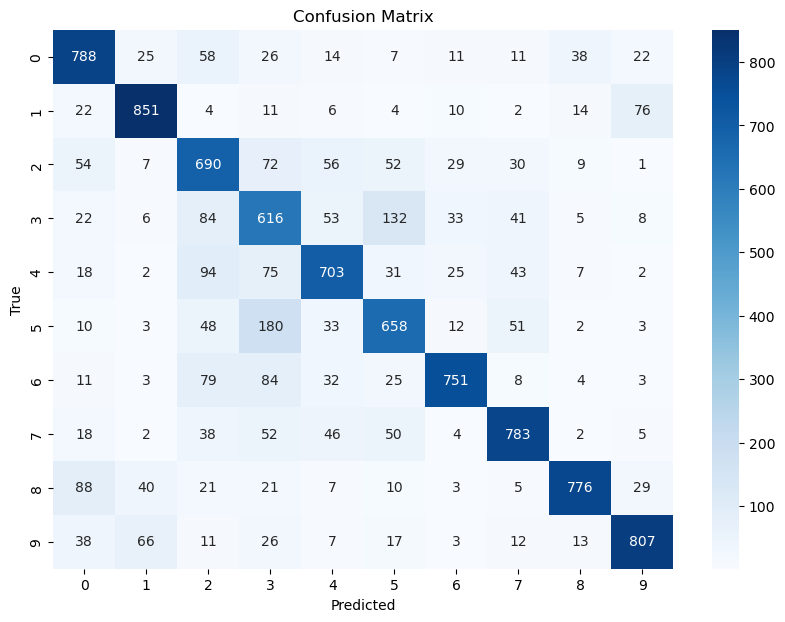

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1000
           1       0.85      0.85      0.85      1000
           2       0.61      0.69      0.65      1000
           3       0.53      0.62      0.57      1000
           4       0.73      0.70      0.72      1000
           5       0.67      0.66      0.66      1000
           6       0.85      0.75      0.80      1000
           7       0.79      0.78      0.79      1000
           8       0.89      0.78      0.83      1000
           9       0.84      0.81      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.75     10000
weighted avg       0.75      0.74      0.75     10000



In [83]:
# EVALUATE THE BEST MODEL

def create_model():

    model = keras.models.Sequential()
    # CNN 
    
    # first convolutional layer
    model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    # second convolutional layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))
    
    # third convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # fourth convolutional layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

    # pooling layer
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # Feed Forward Neural Network
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model on the entire training dataset
model = create_model()
batch_size = 64
epochs = 15
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Get predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))



<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** 

5-fold cross-validation accuracies of above models are as follows:

Model 1 = 0.7069

Model 2 = 0.7254

Model 3 = 0.7075

Model 4 = 0.7438

Model 5 = 0.7211

Model 6 = 0.7415

Out of the  those various hyperparameters and network architectures I tried, the highest 5-fold cross-validation accuracy I achieved 
was 0.7438. When I trained this model on the entire training dataset and evaluated it on the test set, it reached an accuracy of 0.7423.

The classification report provides deeper insights into the model's performance for each class, with metrics like precision, recall, and F1-score. It shows that classes 2 (bird), 3 (cat), and 5 (dog) were particularly difficult to classify, as they had significantly lower F1-scores of 0.65, 0.57, and 0.66, respectively, compared to the other classes. This suggests that the model struggles to differentiate these classes, possibly due to similar features or high variability within these categories. According to the confusion matrix, a significant issue is indicated in distinguishing between cats and dogs, with 132 cat images misclassified as dogs and 182 dog images misclassified as cats. This misclassification likely reflects the visual similarity between these two classes. Similarly, the model had difficulty distinguishing between birds(2) and deer(4). On the other hand, the automobile class achieved the highest F1-score at 0.85. This higher F1-score is likely because automobiles have distinct visual features that set them apart from other classes in the dataset. Precision (the proportion of true positive predictions out of all positive predictions) is  highest for ships, indicating fewer false positives for this class. In contrast, the automobile class had the highest reacll (the proportion of true positives out of all actual positives), showing that most automobiles(851/1000) were correctly identified even if some false positives occurred. On the other end, the cat class had both the lowest precision and recall values, reflecting the model’s overall difficulty in identifying cats accurately among the other classes, particularly dogs. This suggests that additional data augmentation, feature extraction, or fine-tuning could be beneficial to improve the model’s performance in differentiating between visually similar classes.Therefore, eventhough the experiment was relatively successful with a reasonable accuracy of 74%, it needs to be further improved to achieve better classification results.


From the above experiment where I was able to develop a CNN for the classification of the CIFAR-10 dataset, I learned how to effectively use Keras to build a convolutional neural network. I gained insights into the different architectures of CNNs, including how varying the sizes of layers, the number of layers, kernel sizes, and the strategic placement of pooling layers can significantly impact model performance. Additionally, I discovered the importance of hyperparameter tuning, such as adjusting the batch size and the number of epochs, as these factors can lead to notable changes in both training and validation accuracies. I also observed that certain architectural choices and hyperparameter settings can lead to overfitting, which was evidenced by the presence of high training accuracies accompanied by significantly lower validation accuracies. Also, I realized the value of using  5-fold cross validation accuracy instead of using only a single validation accuracy as it provides a more robust evaluation of the model's performance across different subsets of the training data.By analyzing the average validation accuracy from multiple folds, I was able to identify of the model with best effectiveness and reliability. Furthermore, I recognized the significance of tools such as confusion matrices and classification reports, which allow for a deeper understanding of the model's strengths and weaknesses in classifying individual classes. These tools provide essential metrics, including precision, recall, and F1-score, which are crucial for assessing the performance of a model, especially in multi-class classification tasks like CIFAR-10.